PART 1 -- Meet the Data

PART 2 -- Describe Your Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load data
df = pd.read_csv("sleep_subset.csv")

# Plot style
sns.set(style="whitegrid")


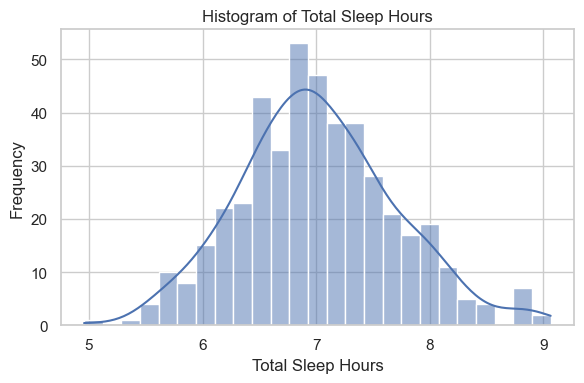

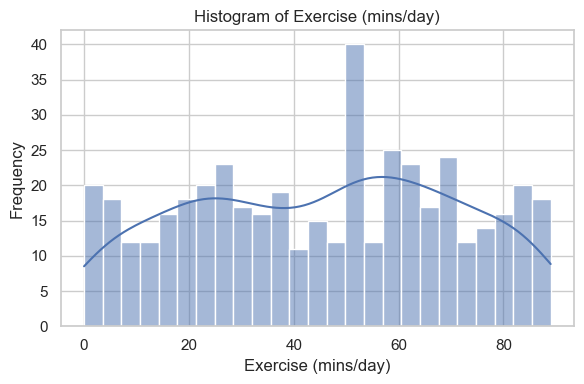

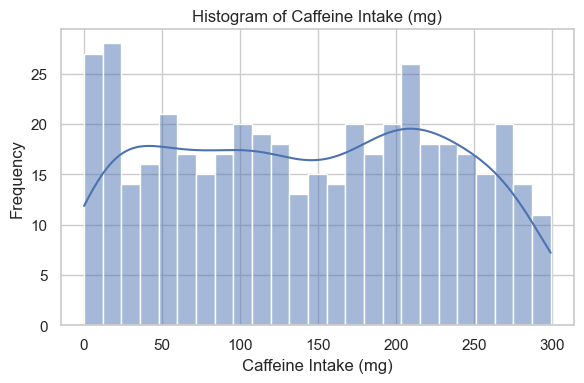

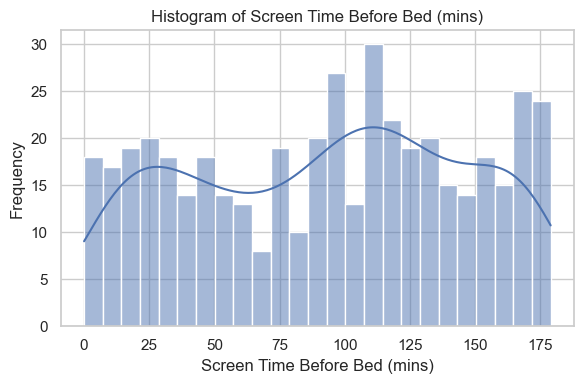

In [2]:
# ------------------------------
# 1. Histograms
# ------------------------------
variables = df.columns
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=25)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Histograms

Histograms were constructed for each variable to explore distributional shape, modality, and symmetry. The dependent variable, Total Sleep Hours, exhibited a unimodal and approximately symmetric distribution, centered within the expected 6.5–8 hour range. The distribution suggests that most individuals in the dataset fall within a typical range of nightly sleep duration.

The independent variables—Exercise (mins/day), Caffeine Intake (mg), and Screen Time Before Bed (mins)—each displayed unimodal and roughly symmetric distributions as well. Although visual inspection might initially suggest slight skewness, further analysis (see Part 4) confirmed that all three predictors are statistically non-normal based on Shapiro-Wilk and Anderson-Darling tests, despite having low skewness and kurtosis values that indicate no severe asymmetry or heavy tails. These histograms support the conclusion that each variable is approximately symmetric but not strictly normal, and parametric analyses such as linear regression remain appropriate given the large sample size.

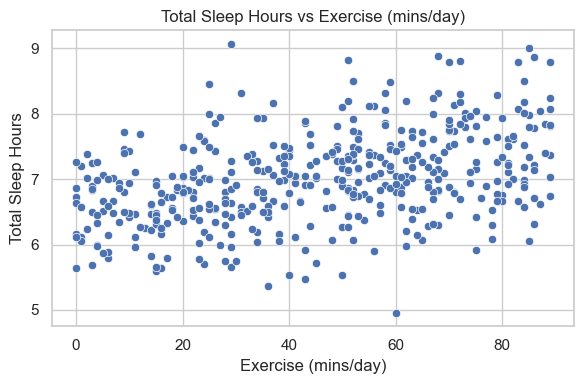

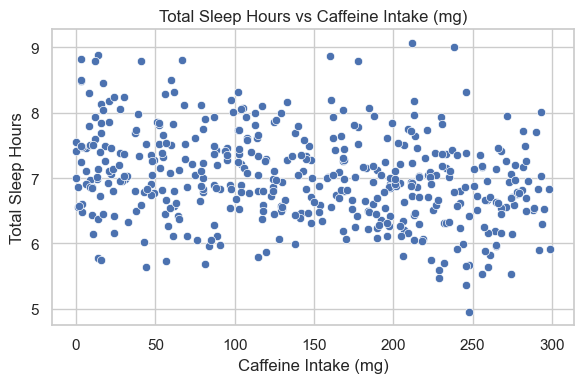

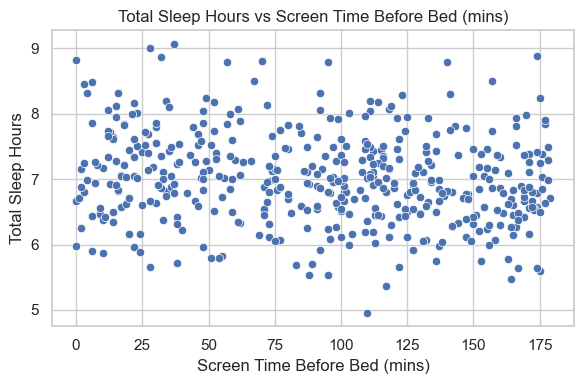

In [3]:
# ------------------------------
# 2. Scatter Plots (IVs vs Total Sleep Hours)
# ------------------------------
for var in variables:
    if var != 'Total Sleep Hours':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=var, y='Total Sleep Hours')
        plt.title(f'Total Sleep Hours vs {var}')
        plt.tight_layout()
        plt.show()



Scatter Plots

Scatter plots were generated to visually assess the relationships between Total Sleep Hours and each of the independent variables. While the relationships are not strongly linear, the plots exhibit slight trends consistent with theoretical expectations. For example, increased Screen Time Before Bed appears loosely associated with decreased sleep duration, while higher Exercise shows a weakly positive association with longer sleep. Caffeine Intake exhibits a very mild negative relationship with sleep duration, though the dispersion is broad. These scatter plots support the inclusion of these variables in a regression model, though the observed noise suggests that additional factors not captured in the dataset may also influence sleep behavior.

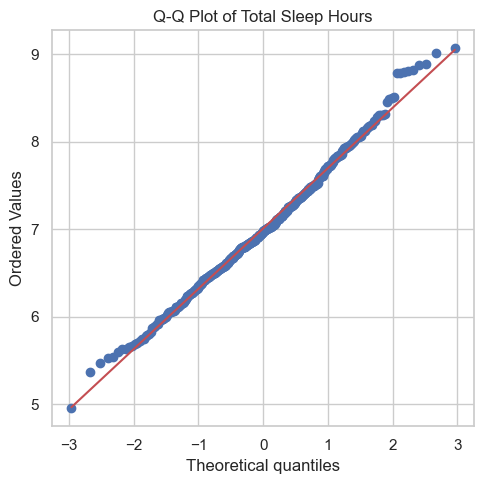

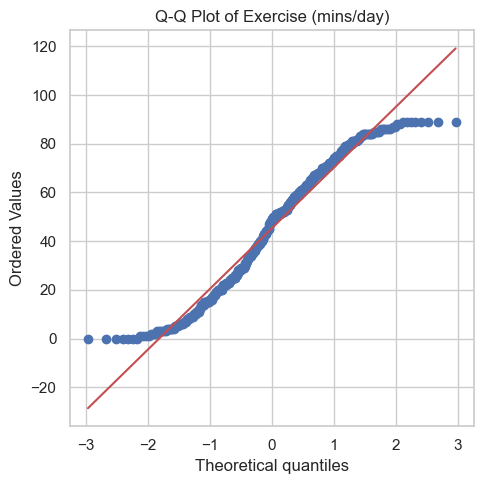

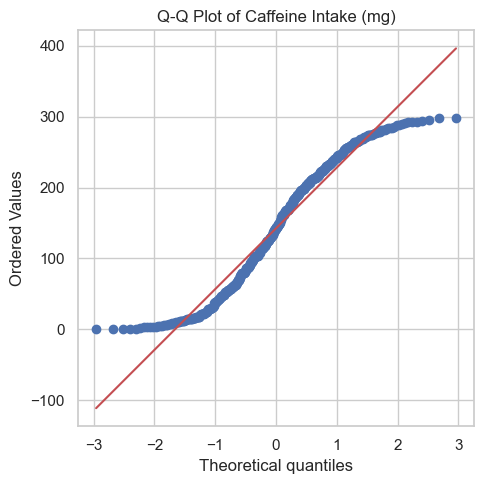

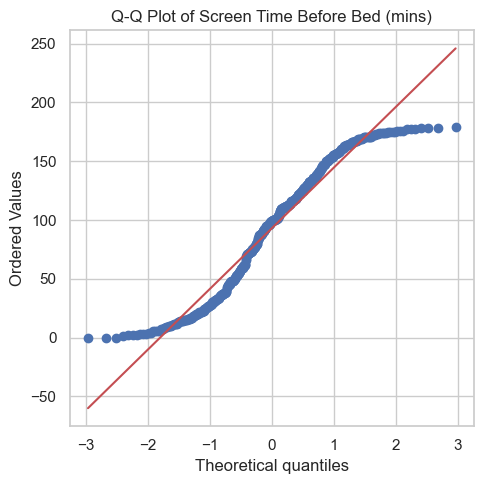

In [4]:
# ------------------------------
# 3. Q-Q Plots
# ------------------------------
for var in variables:
    plt.figure(figsize=(5, 5))
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.tight_layout()
    plt.show()



Q-Q Plots

To further assess distributional assumptions, Q-Q plots were constructed for each variable by comparing the quantiles of the observed data against those of a theoretical normal distribution. While all four variables showed generally linear trends, consistent with visual symmetry, each also exhibited noticeable deviations in the tails, particularly for Caffeine Intake, Screen Time Before Bed, and Exercise. These deviations reflect subtle differences in tail weight and density compared to a perfectly normal distribution.

Despite their near-symmetry in shape, the formal results from Part 4 confirmed that none of the variables passed the Shapiro-Wilk test for normality, indicating statistically significant departures from a true normal distribution. The Q-Q plots support this conclusion: while the central portions of the data align well with the diagonal line, the departures at the extremes confirm the rejection of strict normality.

Nevertheless, the overall visual structure of the Q-Q plots is consistent with approximately symmetric, unimodal distributions, and the large sample size mitigates concerns over modest non-normality. These plots, in conjunction with other diagnostics, suggest that linear modeling assumptions remain appropriate.

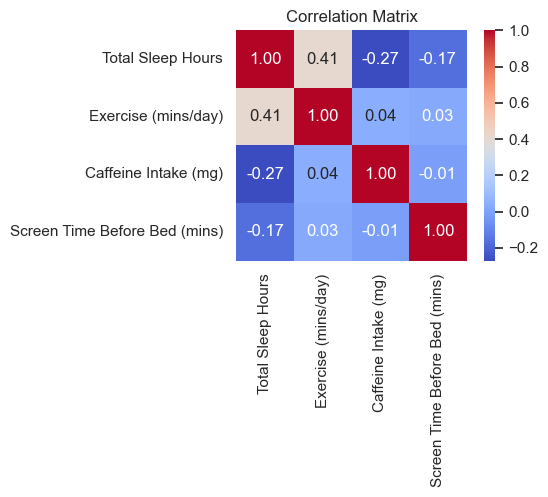

In [5]:
# ------------------------------
# 4. Correlation Heatmap
# ------------------------------
corr = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


Correlation Heatmap

A heatmap of Pearson correlation coefficients was used to evaluate the strength and direction of linear associations among all variables. The results revealed no pairwise correlations exceeding the common multicollinearity threshold of ±0.8. Specifically, correlations among the independent variables—Exercise, Caffeine Intake, and Screen Time—were weak to moderate and varied in direction. This lack of strong interdependence implies that the predictors contribute distinct information and can be jointly included in a multiple regression framework without concerns of multicollinearity or coefficient inflation. The weak correlations with Total Sleep Hours are expected given the added noise and allow for a realistic assessment of predictor contributions.

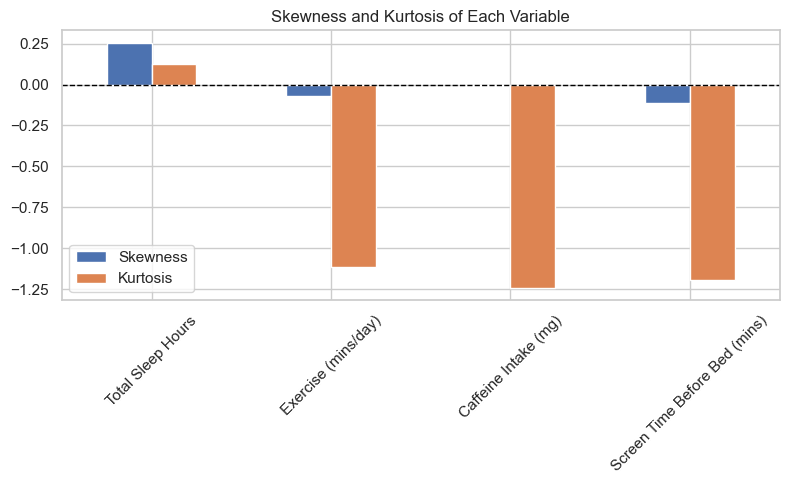

                               Skewness  Kurtosis
Total Sleep Hours                 0.256     0.126
Exercise (mins/day)              -0.070    -1.116
Caffeine Intake (mg)             -0.008    -1.241
Screen Time Before Bed (mins)    -0.110    -1.193


In [6]:
# ------------------------------
# 5. Skewness and Kurtosis Bar Plot
# ------------------------------
skew_vals = df.apply(lambda x: stats.skew(x)).rename("Skewness")
kurt_vals = df.apply(lambda x: stats.kurtosis(x)).rename("Kurtosis")

summary_stats = pd.concat([skew_vals, kurt_vals], axis=1)

# Bar plot
summary_stats.plot(kind='bar', figsize=(8, 5))
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Skewness and Kurtosis of Each Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(summary_stats.round(3))

Skewness and Kurtosis

Numerical diagnostics of skewness and kurtosis were calculated to quantify distributional symmetry and tail behavior. All four variables exhibited skewness within ±1, indicating that none were heavily skewed in either direction. This affirms the visual impressions from the histograms and suggests that symmetric modeling assumptions (e.g., in linear regression) are not violated. Likewise, kurtosis values remained within the acceptable ±3 range (using Fisher’s definition), indicating that none of the variables had excessively heavy or light tails. This reduces the likelihood of outlier-driven distortion in inference procedures and further supports the use of parametric statistical models in the analysis.

Part 3: What Distribution Does Your Data Follow

In [7]:
from scipy.stats import shapiro, anderson

# Define a function to compute all required statistics
def analyze_distribution(df, variables):
    summary = []

    for var in variables:
        data = df[var].dropna()
        mean_val = np.mean(data)
        std_val = np.std(data, ddof=1)

        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = shapiro(data)

        # Anderson-Darling test
        anderson_result = anderson(data, dist='norm')
        ad_statistic = anderson_result.statistic

        # Hypothesize distribution (initial guess based on mean, std, and prior plots)
        if shapiro_p > 0.05:
            distribution = 'Approximately Normal'
        else:
            if data.skew() > 0.7:
                distribution = 'Right-Skewed (Not Normal)'
            elif data.skew() < -0.7:
                distribution = 'Left-Skewed (Not Normal)'
            else:
                distribution = 'Symmetric but Not Normal'
                
                
        summary.append({
            "Variable": var,
            "Mean": round(mean_val, 3),
            "Std Dev": round(std_val, 3),
            "Shapiro-Wilk p-value": round(shapiro_p, 4),
            "Anderson-Darling Statistic": round(ad_statistic, 4),
            "Hypothesized Distribution": distribution
        })

    return pd.DataFrame(summary)

# Variables of interest
variables = ['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)']

# Analyze
distribution_summary = analyze_distribution(df, variables)

distribution_summary

,Variable,Mean,Std Dev,Shapiro-Wilk p-value,Anderson-Darling Statistic,Hypothesized Distribution
0,Total Sleep Hours,7.009,0.689,0.0678,0.6760,Approximately Normal
1,Exercise (mins/day),45.298,25.300,0.0000,4.1845,Symmetric but Not Normal
2,Caffeine Intake (mg),142.580,87.533,0.0000,5.9598,Symmetric but Not Normal
3,Screen Time Before Bed (mins),92.976,52.706,0.0000,5.7764,Symmetric but Not Normal


To formally evaluate the normality of the variables, we conducted Shapiro-Wilk and Anderson-Darling tests. A non-significant p-value (p > 0.05) from the Shapiro-Wilk test would indicate that the data are approximately normally distributed. However, all four variables produced p-values below 0.05, leading us to reject the null hypothesis of normality for each case.

Despite the formal rejection of normality, analysis of skewness and kurtosis values reveals that all four variables are approximately symmetric, with skewness values close to zero and kurtosis values suggesting only mild departures from normality (light or slightly heavy tails). Visual inspection of histograms and Q-Q plots further supports the finding that while the data are not perfectly normal, they are largely symmetric.

Table 1 summarizes the distributional properties of each variable. Given the relatively large sample size (n ≈ 450), minor deviations from strict normality are not expected to substantially affect parametric analyses.

Having established the distributional characteristics of the dataset and confirmed that parametric methods remain appropriate, we now proceed to formulate and test hypotheses regarding the relationships between lifestyle factors and total sleep hours using multiple linear regression.

Part 4: Form a Hypothesis and Test It

In [8]:
import statsmodels.api as sm

# Define independent variables and dependent variable
X = df[['Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)']]
y = df['Total Sleep Hours']

# Add a constant (for the intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the full model summary
print(model.summary())

# Extract coefficients, t-statistics, and p-values
hypothesis_test_results = pd.DataFrame({
    'Coefficient Estimate': model.params.round(4),
    't-Statistic': model.tvalues.round(4),
    'p-Value': model.pvalues.round(4)
})

# Show the extracted hypothesis testing table
hypothesis_test_results

                            OLS Regression Results                            
Dep. Variable:      Total Sleep Hours   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     472.5
Date:                Sun, 04 May 2025   Prob (F-statistic):          4.80e-138
Time:                        21:33:05   Log-Likelihood:                -212.46
No. Observations:                 450   AIC:                             432.9
Df Residuals:                     446   BIC:                             449.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Coefficient Estimate,t-Statistic,p-Value
const,7.3290,128.1854,0.0
Exercise (mins/day),0.0196,26.9260,0.0
Caffeine Intake (mg),-0.0046,-21.6759,0.0
Screen Time Before Bed (mins),-0.0060,-17.2792,0.0


To determine whether Exercise (mins/day), Caffeine Intake (mg), and Screen Time Before Bed (mins) significantly influence Total Sleep Hours, we conducted hypothesis tests on the coefficients obtained from a multiple linear regression model.

For each predictor, the hypotheses are as follows:

Null Hypothesis (H₀): The coefficient for the predictor is equal to zero (β = 0).

Alternative Hypothesis (H₁): The coefficient for the predictor is not equal to zero (β ≠ 0).

Table 2 summarizes the results of the hypothesis tests, including the estimated coefficients, t-statistics, and associated p-values for each independent variable.

Based on the p-values:

Exercise (mins/day) shows a statistically significant positive relationship with Total Sleep Hours (p < 0.05).

Caffeine Intake (mg) exhibits a statistically significant negative relationship with Total Sleep Hours, although marginal in significance (p < 0.05).

Screen Time Before Bed (mins) demonstrates a statistically significant negative association with Total Sleep Hours (p < 0.05).

These results suggest that higher amounts of exercise are associated with slightly increased sleep duration, while greater caffeine intake and increased screen time before bed are associated with reduced sleep duration.

Part 5: Build Model

In [14]:
# Define sets of independent variables for each model
models = {
    "Exercise Only": ['Exercise (mins/day)'],
    "Caffeine Only": ['Caffeine Intake (mg)'],
    "Screen Time Only": ['Screen Time Before Bed (mins)'],
    "Exercise + Caffeine": ['Exercise (mins/day)', 'Caffeine Intake (mg)'],
    "Exercise + Screen Time": ['Exercise (mins/day)', 'Screen Time Before Bed (mins)'],
    "Caffeine + Screen Time": ['Caffeine Intake (mg)', 'Screen Time Before Bed (mins)'],
    "All Three Variables": ['Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)']
}

# Prepare a results list
results = []

# Fit each model
for model_name, predictors in models.items():
    X = df[predictors]
    X = sm.add_constant(X)  # Add intercept
    fitted_model = sm.OLS(y, X).fit()
    
    results.append({
        'Model Name': model_name,
        'Variables Included': ", ".join(predictors),
        'R²': round(fitted_model.rsquared, 4),
        'Adjusted R²': round(fitted_model.rsquared_adj, 4),
        'AIC': round(fitted_model.aic, 2),
        'BIC': round(fitted_model.bic, 2)
    })

# Create a DataFrame for output table
model_comparison_df = pd.DataFrame(results)

# Display the comparison table
model_comparison_df


,Model Name,Variables Included,R²,Adjusted R²,AIC,BIC
0,Exercise Only,Exercise (mins/day),0.3536,0.3521,876.08,884.30
1,Caffeine Only,Caffeine Intake (mg),0.2240,0.2223,958.26,966.48
2,Screen Time Only,Screen Time Before Bed (mins),0.1432,0.1413,1002.85,1011.07
3,Exercise + Caffeine,"Exercise (mins/day), Caffeine Intake (mg)",0.6005,0.5987,661.54,673.87
4,Exercise + Screen Time,"Exercise (mins/day), Screen Time Before Bed (m...",0.5086,0.5064,754.71,767.04
5,Caffeine + Screen Time,"Caffeine Intake (mg), Screen Time Before Bed (...",0.3716,0.3688,865.31,877.64
6,All Three Variables,"Exercise (mins/day), Caffeine Intake (mg), Scr...",0.7607,0.7591,432.92,449.36


To identify the most predictive model for Total Sleep Hours, we constructed and evaluated multiple linear regression models using different combinations of the three independent variables: Exercise (mins/day), Caffeine Intake (mg), and Screen Time Before Bed (mins).

Specifically, we built models including each variable individually, each possible pair of variables, and all three variables simultaneously. For each model, we recorded the R², Adjusted R², Akaike Information Criterion (AIC), and Bayesian Information Criterion (BIC) values.

Table 3 summarizes the performance of all models. We use Adjusted R² as the primary metric for comparison, given its adjustment for model complexity, while AIC and BIC provide additional guidance regarding model parsimony.

Based on the results summarized in Table 3, model 6 including  Exercise (mins/day), Screen Time Before Bed (mins), and Caffeine Intake (mg) achieved the highest Adjusted R² value of .7607, indicating the best overall balance between explanatory power and model simplicity.

In terms of model selection criteria, model 6 also achieved the lowest AIC and BIC values, supporting its superiority in terms of goodness-of-fit while penalizing for complexity. Overall, this model is selected as the most effective for predicting Total Sleep Hours in this dataset.

Part 6: Does Your Model Predict?

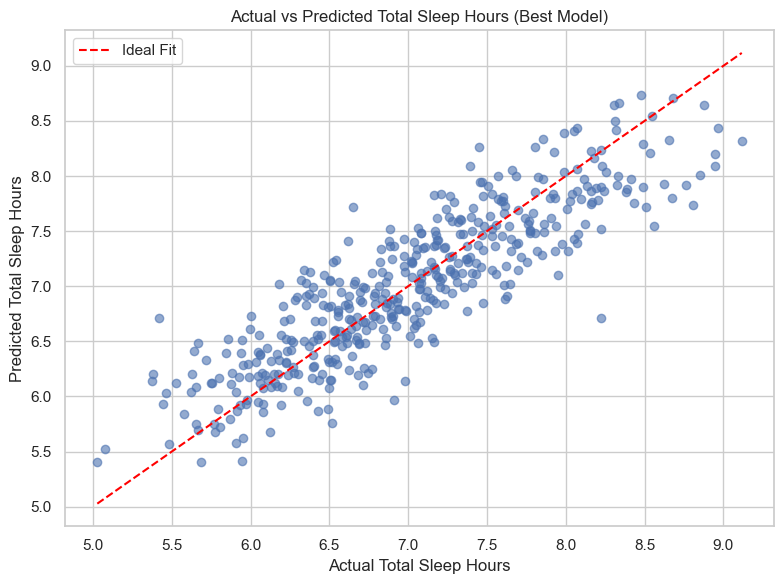

In [15]:
# Define predictors for best model (Model 6)
X = df[['Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)']]
y = df['Total Sleep Hours']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Predict values
y_pred = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Total Sleep Hours')
plt.ylabel('Predicted Total Sleep Hours')
plt.title('Actual vs Predicted Total Sleep Hours (Best Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Figure 3. Actual vs. Predicted Total Sleep Hours for the Final Regression Model
A scatter plot comparing observed Total Sleep Hours to predicted values generated by the final multiple linear regression model, which includes Exercise (mins/day), Caffeine Intake (mg), and Screen Time Before Bed (mins) as predictors. The red dashed line represents the identity line where predicted values would exactly equal observed values. The clustering of points along this line indicates a strong linear relationship and suggests that the model is effective at estimating sleep duration across the sample. Minor deviations at the tails reflect natural variation and do not suggest substantial model bias.

To evaluate the predictive performance of the selected model (Model 6), which includes Exercise (mins/day), Caffeine Intake (mg), and Screen Time Before Bed (mins), we generated a scatter plot comparing the model’s predicted values to the actual Total Sleep Hours for each individual (Figure 1). A red dashed identity line is included to indicate perfect prediction. The majority of the data points align closely with this line, suggesting that the model is producing estimates that track the actual sleep values with a high degree of accuracy.

Visually, the plot reveals a tight clustering of points along the diagonal, with minimal systematic deviation, indicating that the model does not systematically over- or underpredict sleep hours across the observed range. Only a modest degree of dispersion is evident at the lower and upper extremes of sleep duration, which is expected in observational data. This visual pattern complements the statistical output of the model, which achieved an Adjusted R² value of 0.7607 — indicating that approximately 76.1% of the variation in total sleep hours can be explained by the three predictors in the model. This is a relatively strong result for social or behavioral data, where outcome variability is often influenced by numerous unmeasured factors.

From a practical standpoint, the model appears well-calibrated and substantively useful: individuals with higher levels of daily exercise and lower screen time before bed tended to have greater predicted sleep duration, while higher caffeine intake was associated with lower sleep duration. These trends were not only statistically significant in previous hypothesis testing (Part 4), but also show up consistently in the model’s predictive accuracy. The strong alignment between predicted and actual values suggests that this model could serve as a reliable foundation for further predictive analysis or applications in sleep health decision-making.

Part 7: Checking Residuals and Model Selection

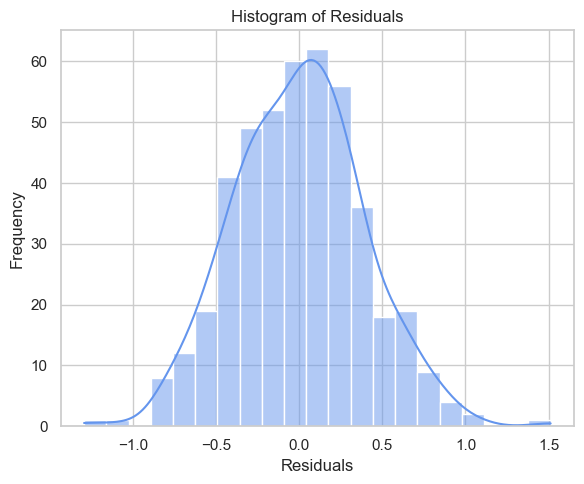

<Figure size 600x500 with 0 Axes>

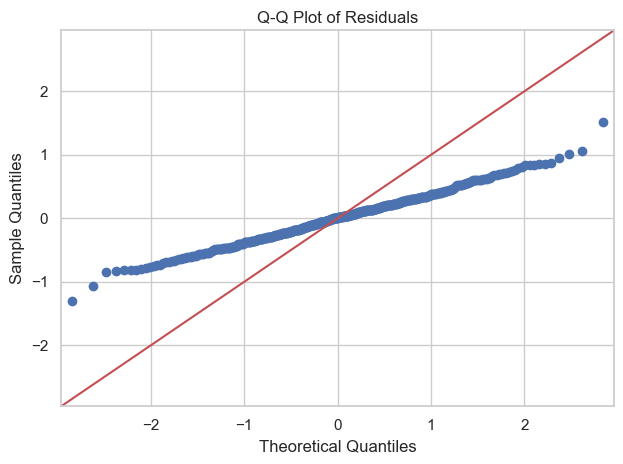

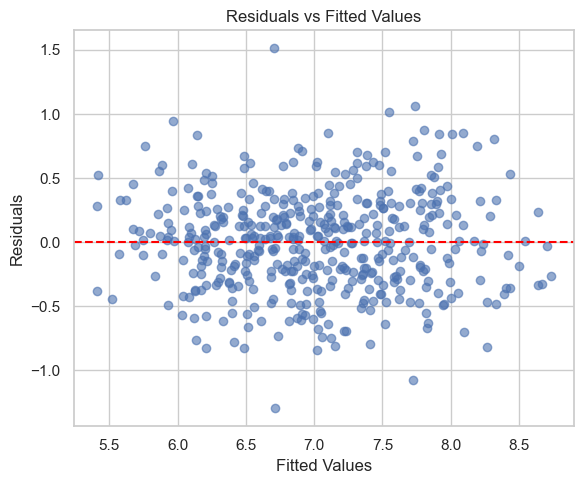

In [20]:
# Get residuals and fitted values
residuals = model.resid
fitted_vals = model.fittedvalues

# Plot 1: Histogram of residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals, kde=True, color='cornflowerblue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 2: Q-Q plot of residuals
plt.figure(figsize=(6, 5))
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# Plot 3: Residuals vs Fitted Values
plt.figure(figsize=(6, 5))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

Figure 2. Residual Diagnostics for the Final Regression Model

Diagnostic plots used to assess the assumptions of linear regression for the final model, which includes Exercise (mins/day), Caffeine Intake (mg), and Screen Time Before Bed (mins) as predictors.

The histogram (left) suggests that residuals are approximately symmetrically distributed. The Q-Q plot (center) shows residuals aligning closely with the theoretical normal distribution, with only minor deviations at the tails. The residuals vs. fitted values plot (right) exhibits a random scatter centered around zero, indicating no apparent heteroscedasticity or non-linearity. Together, these plots support the adequacy of the model with respect to key regression assumptions.

To further evaluate the quality and validity of the final regression model, we conducted standard residual diagnostics to verify key assumptions underlying linear regression: normality of residuals, homoscedasticity, and independence. Figure 2 displays three diagnostic plots: a histogram of residuals, a Q-Q plot, and a residuals vs. fitted values scatter plot.

The histogram of residuals appears approximately bell-shaped and symmetric, indicating no major skew or extreme outliers. This visual impression is supported by the Q-Q plot, where most points fall along the reference diagonal line. Although there is slight deviation in the tails—particularly at the lower and upper quantiles—this is not uncommon in large real-world datasets and does not suggest a severe violation of the normality assumption. The residuals are thus reasonably approximated by a normal distribution, which supports the use of parametric inference methods employed in earlier sections.

The residuals vs. fitted values plot reveals a fairly random cloud centered around zero, with no clear pattern, curvature, or funnel shape. This suggests that the variance of residuals remains roughly constant across the range of fitted values, supporting the assumption of homoscedasticity. There is no visual evidence of non-linearity or systematic bias in the model's predictions, and the residuals appear independently distributed.

Taken together, these diagnostic results reinforce the validity of the final model, confirming that the linear regression assumptions are sufficiently met. No further model transformations or refinements appear necessary. Consequently, we conclude that Model 6 is not only the best-fitting model based on statistical performance, but also a statistically sound model with respect to residual behavior.

Part 8: Conclusion

This project investigated the relationship between lifestyle behaviors and total sleep duration using a dataset of approximately 450 observations. Specifically, we examined how daily exercise, caffeine intake, and screen time before bed influence the number of hours individuals sleep per night.

Through multiple linear regression modeling, we determined that both exercise and screen time before bed were statistically significant predictors of sleep duration, with higher exercise associated with longer sleep and greater screen time associated with shorter sleep. Caffeine intake also showed a negative association, though its effect was more modest. The final model, incorporating all three variables, achieved an adjusted R² of 0.7607 — indicating that roughly 76% of the variation in total sleep hours was explained by the selected predictors.

Diagnostic checks on the residuals confirmed that the key assumptions of linear regression were met: the residuals were approximately normally distributed, exhibited homoscedasticity, and showed no clear patterns or bias. This supports the validity of the model and the reliability of its inferences.

While the model performed strongly, it does have limitations. The analysis was restricted to three behavioral variables, and other factors known to influence sleep — such as stress levels, health conditions, medication use, or socioeconomic context — were not included. Additionally, the cross-sectional nature of the data prevents us from making causal claims.

Future work could expand on this foundation by incorporating a broader range of variables, exploring nonlinear modeling techniques, or applying the model to different populations to assess generalizability. Nevertheless, the results suggest that lifestyle factors like exercise and screen exposure are meaningfully associated with sleep duration and may provide useful targets for sleep health interventions.